In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [47]:
df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [48]:
print(df.isnull().sum())
df.dropna(inplace=True)
df['content'] = df['title'] + ' ' + df['text']
df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1})



Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


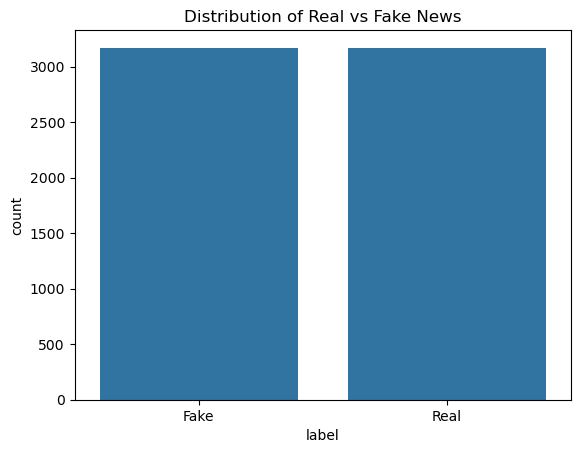

In [49]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Real vs Fake News')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

lowercasing

In [50]:
df['content'] = df['content'].str.lower()


Removing Punctuation and Special Characters

In [51]:
import re
df['content'] = df['content'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [52]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['content'] = df['content'].apply(lambda x: ' '.join(stemmer.stem(word) for word in x.split()))


 Removing Numbers (Optional)

In [53]:
df['content'] = df['content'].apply(lambda x: re.sub(r'\d+', '', x))


 Whitespace Normalization

In [54]:
df['content'] = df['content'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())


In [55]:
# Step 1: Load the data
df = pd.read_csv("news.csv")

# Step 2: Drop rows with null title, text, or label
df = df.dropna(subset=['title', 'text', 'label'])

# Step 3: Only keep rows where label is either 'REAL' or 'FAKE'
df = df[df['label'].isin(['REAL', 'FAKE'])]

# Step 4: Create content field
df['content'] = df['title'] + ' ' + df['text']

# Step 5: Encode labels
df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1})

# Step 6: Drop any leftover NaNs just in case
df = df.dropna(subset=['content', 'label'])

# Check if any issues remain
print("Shape after cleaning:", df.shape)
print(df['label'].value_counts())


Shape after cleaning: (6335, 5)
label
1    3171
0    3164
Name: count, dtype: int64


In [56]:
X = df['content']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


TF-IDF

In [57]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


 Train Model

In [58]:
classifier = PassiveAggressiveClassifier(max_iter=1000)
classifier.fit(X_train_tfidf, y_train)


PassiveAggressiveClassifier()

Evaluation

Accuracy: 0.9329123914759274

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       628
           1       0.93      0.93      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



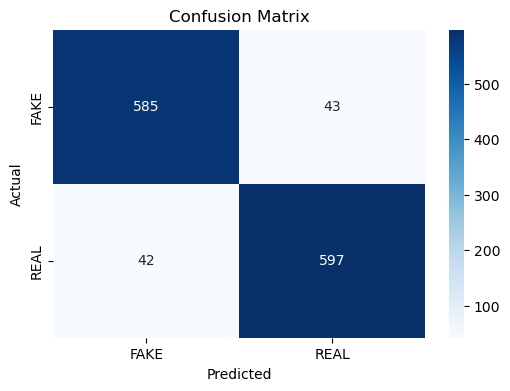

In [59]:
y_pred = classifier.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [60]:
joblib.dump(classifier, 'fake_news_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

Multinomial Naive Bayes

In [61]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test_tfidf)

print("🔹 Multinomial Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


🔹 Multinomial Naive Bayes Accuracy: 0.8484609313338595
              precision    recall  f1-score   support

           0       0.97      0.71      0.82       628
           1       0.78      0.98      0.87       639

    accuracy                           0.85      1267
   macro avg       0.88      0.85      0.85      1267
weighted avg       0.87      0.85      0.85      1267



 Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

# Initialize and train
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test_tfidf)

print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


🔹 Logistic Regression Accuracy: 0.9139700078926598
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       628
           1       0.93      0.90      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



Visualize Confusion Matrices

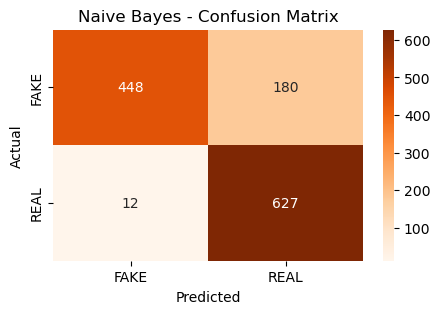

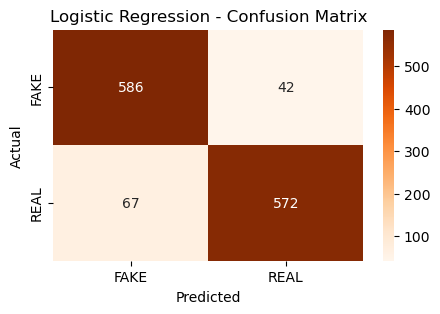

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_cm("Naive Bayes", y_test, y_pred_nb)
plot_cm("Logistic Regression", y_test, y_pred_lr)
